In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans


   0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190 NaN NaN  
1  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236 NaN NaN  
2  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442 NaN NaN  
3  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739 NaN NaN  
4  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044 NaN NaN  

[5 rows x 28 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 

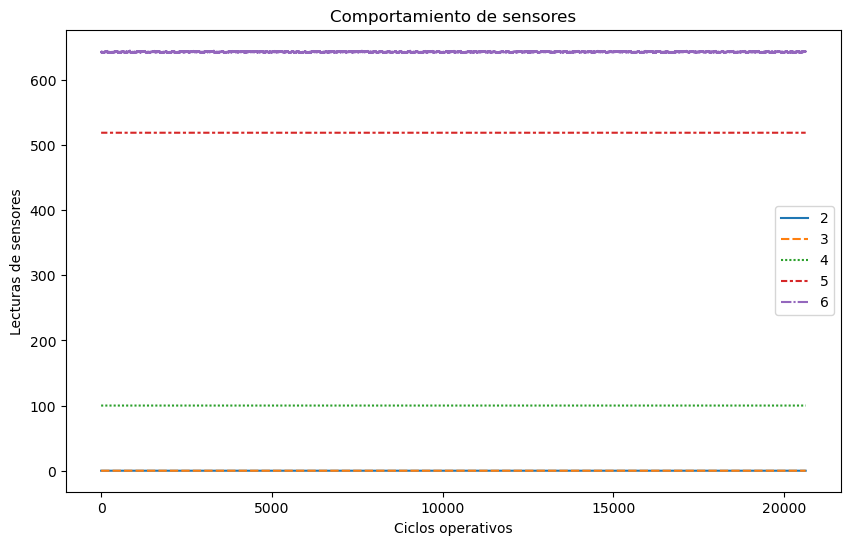

In [2]:
file_path_train = "../data/raw/train_FD001.txt"  # Cambiar por la ruta correcta

data_train = pd.read_csv(file_path_train, sep=' ', header=None)  
print(data_train.head())
print(data_train.info())

# Visualizar algunas de las columnas de la serie temporal
plt.figure(figsize=(10,6))
sns.lineplot(data=data_train.iloc[:, 2:7])  # Aquí graficamos las primeras 5 columnas para ver el comportamiento
plt.title("Comportamiento de sensores")
plt.xlabel("Ciclos operativos")
plt.ylabel("Lecturas de sensores")
plt.show()


In [3]:
empty_columns = data_train.columns[(data_train.isna().all() | (data_train == 0).all())].tolist()
data_train.drop(columns=empty_columns, inplace=True)
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
op_conditions = data_train[[2, 3, 4]]
scaler = MinMaxScaler ()
op_conditions_scaled = scaler.fit_transform(op_conditions)
op_conditions_scaled

array([[0.45977011, 0.16666667, 0.        ],
       [0.6091954 , 0.25      , 0.        ],
       [0.25287356, 0.75      , 0.        ],
       ...,
       [0.52298851, 0.5       , 0.        ],
       [0.43678161, 0.75      , 0.        ],
       [0.31609195, 0.08333333, 0.        ]])

In [5]:

op_conditions_scaled = pd.DataFrame(op_conditions_scaled)
empty_columns = op_conditions_scaled.columns[(op_conditions_scaled.isna().all() | (op_conditions_scaled == 0).all())].tolist()
op_conditions_scaled.drop(columns=empty_columns, inplace=True)
op_conditions_scaled.head()

,0,1
0,0.459770,0.166667
1,0.609195,0.250000
2,0.252874,0.750000
3,0.540230,0.500000
4,0.390805,0.333333


In [6]:
data_train[[2, 3]] = op_conditions_scaled[[0, 1]]
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,0.459770,0.166667,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.609195,0.250000,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,0.252874,0.750000,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.540230,0.500000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,0.390805,0.333333,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
op_conditions_scaled=op_conditions_scaled.to_numpy()
op_conditions_scaled

array([[0.45977011, 0.16666667],
       [0.6091954 , 0.25      ],
       [0.25287356, 0.75      ],
       ...,
       [0.52298851, 0.5       ],
       [0.43678161, 0.75      ],
       [0.31609195, 0.08333333]])

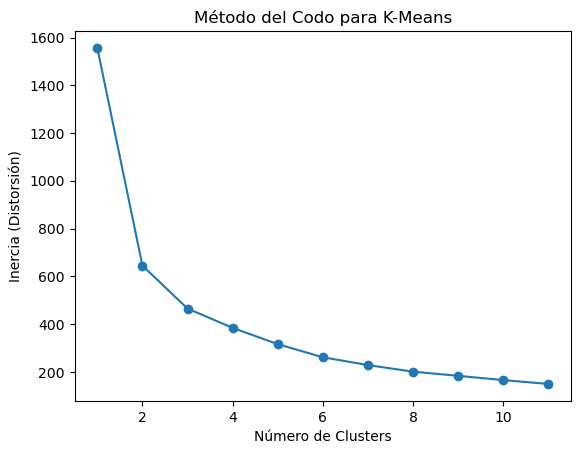

In [9]:
import matplotlib.pyplot as plt
distortions = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(op_conditions_scaled)
    distortions.append(kmeans.inertia_)  # Suma de distancias al cuadrado

plt.plot(range(1, 12), distortions, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia (Distorsión)')
plt.title('Método del Codo para K-Means')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=4, random_state=42)
data_train['op_cluster'] = kmeans.fit_predict(op_conditions)

In [11]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,op_cluster
0,1,1,0.459770,0.166667,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,3
1,1,2,0.609195,0.250000,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,1
2,1,3,0.252874,0.750000,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,2
3,1,4,0.540230,0.500000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,1,5,0.390805,0.333333,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,3


In [12]:
sensor_cols = [i for i in range(5, 26)]  # Columnas de sensores
data_train[sensor_cols] = data_train[sensor_cols].astype('float64')

for cluster in data_train['op_cluster'].unique():
    mask = data_train['op_cluster'] == cluster
    data_train.loc[mask, sensor_cols] = scaler.fit_transform(data_train.loc[mask, sensor_cols])

In [13]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,op_cluster
0,1,1,0.459770,0.166667,100.0,0.0,0.168712,0.414463,0.326164,0.0,...,0.205882,0.181029,0.387807,0.0,0.300000,0.0,0.0,0.771930,0.758820,3
1,1,2,0.609195,0.250000,100.0,0.0,0.285714,0.532547,0.328845,0.0,...,0.304348,0.178997,0.411312,0.0,0.272727,0.0,0.0,0.672000,0.730050,1
2,1,3,0.252874,0.750000,100.0,0.0,0.360656,0.419199,0.351630,0.0,...,0.174603,0.150922,0.353448,0.0,0.111111,0.0,0.0,0.654867,0.614064,2
3,1,4,0.540230,0.500000,100.0,0.0,0.335366,0.228752,0.277007,0.0,...,0.292308,0.168236,0.149625,0.0,0.363636,0.0,0.0,0.573643,0.644570,0
4,1,5,0.390805,0.333333,100.0,0.0,0.337423,0.254154,0.426058,0.0,...,0.235294,0.154889,0.429721,0.0,0.400000,0.0,0.0,0.631579,0.737710,3


In [14]:
data_train.drop(columns=4, inplace=True)
empty_columns = data_train.columns[(data_train.isna().all() | (data_train == 0).all())].tolist()
data_train.drop(columns=empty_columns, inplace=True)
data_train.head()

,0,1,2,3,6,7,8,10,11,12,13,15,16,17,18,19,21,24,25,op_cluster
0,1,1,0.459770,0.166667,0.168712,0.414463,0.326164,1.0,0.698582,0.254237,0.097450,0.371257,0.621978,0.205882,0.181029,0.387807,0.300000,0.771930,0.758820,3
1,1,2,0.609195,0.250000,0.285714,0.532547,0.328845,1.0,0.670103,0.311111,0.100487,0.401274,0.764988,0.304348,0.178997,0.411312,0.272727,0.672000,0.730050,1
2,1,3,0.252874,0.750000,0.360656,0.419199,0.351630,1.0,0.752515,0.254237,0.150919,0.203947,0.832947,0.174603,0.150922,0.353448,0.111111,0.654867,0.614064,2
3,1,4,0.540230,0.500000,0.335366,0.228752,0.277007,1.0,0.763941,0.307692,0.116109,0.161677,0.889126,0.292308,0.168236,0.149625,0.363636,0.573643,0.644570,0
4,1,5,0.390805,0.333333,0.337423,0.254154,0.426058,1.0,0.634752,0.254237,0.139227,0.257485,0.738462,0.235294,0.154889,0.429721,0.400000,0.631579,0.737710,3


In [15]:

data_train.columns = range(len(data_train.columns))
data_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,0.459770,0.166667,0.168712,0.414463,0.326164,1.0,0.698582,0.254237,0.097450,0.371257,0.621978,0.205882,0.181029,0.387807,0.300000,0.771930,0.758820,3
1,1,2,0.609195,0.250000,0.285714,0.532547,0.328845,1.0,0.670103,0.311111,0.100487,0.401274,0.764988,0.304348,0.178997,0.411312,0.272727,0.672000,0.730050,1
2,1,3,0.252874,0.750000,0.360656,0.419199,0.351630,1.0,0.752515,0.254237,0.150919,0.203947,0.832947,0.174603,0.150922,0.353448,0.111111,0.654867,0.614064,2
3,1,4,0.540230,0.500000,0.335366,0.228752,0.277007,1.0,0.763941,0.307692,0.116109,0.161677,0.889126,0.292308,0.168236,0.149625,0.363636,0.573643,0.644570,0
4,1,5,0.390805,0.333333,0.337423,0.254154,0.426058,1.0,0.634752,0.254237,0.139227,0.257485,0.738462,0.235294,0.154889,0.429721,0.400000,0.631579,0.737710,3


In [16]:
data_train.to_csv('../data/processed/train_FD001.txt', float_format='%.6f',sep=' ', index=False, header=False)

In [17]:
data_train = pd.read_csv('../data/processed/train_FD001.txt', sep=' ', header=None)
data_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,0.459770,0.166667,0.168712,0.414463,0.326164,1.0,0.698582,0.254237,0.097450,0.371257,0.621978,0.205882,0.181029,0.387807,0.300000,0.771930,0.758820,3
1,1,2,0.609195,0.250000,0.285714,0.532547,0.328845,1.0,0.670103,0.311111,0.100487,0.401274,0.764988,0.304348,0.178997,0.411312,0.272727,0.672000,0.730050,1
2,1,3,0.252874,0.750000,0.360656,0.419199,0.351630,1.0,0.752515,0.254237,0.150919,0.203947,0.832947,0.174603,0.150922,0.353448,0.111111,0.654867,0.614064,2
3,1,4,0.540230,0.500000,0.335366,0.228752,0.277007,1.0,0.763941,0.307692,0.116109,0.161677,0.889126,0.292308,0.168236,0.149625,0.363636,0.573643,0.644570,0
4,1,5,0.390805,0.333333,0.337423,0.254154,0.426058,1.0,0.634752,0.254237,0.139227,0.257485,0.738462,0.235294,0.154889,0.429721,0.400000,0.631579,0.737710,3


In [18]:
file_path_train = "../data/raw/test_FD001.txt"  # Cambiar por la ruta correcta

data_test = pd.read_csv(file_path_train, sep=' ', header=None)  
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [20]:
empty_columns = data_test.columns[(data_test.isna().all() | (data_test == 0).all())].tolist()
data_test.drop(columns=empty_columns, inplace=True)
op_conditions = data_test[[2, 3, 4]]
scaler = MinMaxScaler()
op_conditions_scaled = scaler.fit_transform(op_conditions)
op_conditions_scaled

array([[0.65625   , 0.69230769, 0.        ],
       [0.34375   , 0.23076923, 0.        ],
       [0.53125   , 0.53846154, 0.        ],
       ...,
       [0.475     , 0.23076923, 0.        ],
       [0.275     , 0.53846154, 0.        ],
       [0.59375   , 0.69230769, 0.        ]])

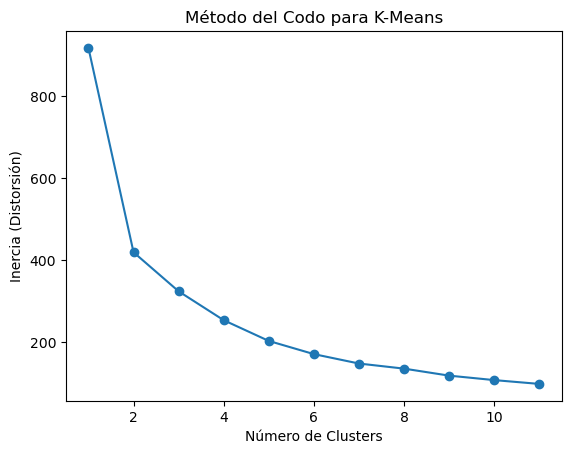

In [21]:
op_conditions_scaled = pd.DataFrame(op_conditions_scaled)
empty_columns = op_conditions_scaled.columns[(op_conditions_scaled.isna().all() | (op_conditions_scaled == 0).all())].tolist()
op_conditions_scaled.drop(columns=empty_columns, inplace=True)
data_test[[2, 3]] = op_conditions_scaled[[0, 1]]
op_conditions_scaled=op_conditions_scaled.to_numpy()
distortions = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(op_conditions_scaled)
    distortions.append(kmeans.inertia_)  # Suma de distancias al cuadrado

plt.plot(range(1, 12), distortions, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia (Distorsión)')
plt.title('Método del Codo para K-Means')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=4, random_state=42)
data_test['op_cluster'] = kmeans.fit_predict(op_conditions)
sensor_cols = [i for i in range(5, 26)]  # Columnas de sensores
data_test[sensor_cols] = data_test[sensor_cols].astype('float64')

for cluster in data_test['op_cluster'].unique():
    mask = data_test['op_cluster'] == cluster
    data_test.loc[mask, sensor_cols] = scaler.fit_transform(data_test.loc[mask, sensor_cols])
data_test.drop(columns=4, inplace=True)
empty_columns = data_test.columns[(data_test.isna().all() | (data_test == 0).all())].tolist()
data_test.drop(columns=empty_columns, inplace=True)
data_test.head()

,0,1,2,3,6,7,8,10,11,12,13,15,16,17,18,19,21,24,25,op_cluster
0,1,1,0.65625,0.692308,0.622222,0.436828,0.278853,1.0,0.582796,0.333333,0.193571,0.264706,0.554404,0.325581,0.134524,0.347076,0.375,0.504587,0.658896,3
1,1,2,0.34375,0.230769,0.194444,0.477142,0.213867,1.0,0.800000,0.307692,0.198931,0.457143,0.680328,0.350000,0.255981,0.207262,0.500,0.663366,0.669670,0
2,1,3,0.53125,0.538462,0.394737,0.420037,0.364830,1.0,0.671518,0.368421,0.261469,0.518519,0.591324,0.350000,0.198639,0.520376,0.500,0.737374,0.645085,2
3,1,4,0.77500,0.461538,0.448630,0.394811,0.439800,1.0,0.618005,0.323529,0.122718,0.296875,0.441261,0.421053,0.228969,0.242330,0.250,0.613208,0.613994,1
4,1,5,0.60000,0.461538,0.433333,0.487903,0.361352,1.0,0.638710,0.256410,0.150350,0.345588,0.665803,0.325581,0.171824,0.337009,0.125,0.623853,0.718304,3


In [23]:

data_test.columns = range(len(data_test.columns))
data_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,0.65625,0.692308,0.622222,0.436828,0.278853,1.0,0.582796,0.333333,0.193571,0.264706,0.554404,0.325581,0.134524,0.347076,0.375,0.504587,0.658896,3
1,1,2,0.34375,0.230769,0.194444,0.477142,0.213867,1.0,0.800000,0.307692,0.198931,0.457143,0.680328,0.350000,0.255981,0.207262,0.500,0.663366,0.669670,0
2,1,3,0.53125,0.538462,0.394737,0.420037,0.364830,1.0,0.671518,0.368421,0.261469,0.518519,0.591324,0.350000,0.198639,0.520376,0.500,0.737374,0.645085,2
3,1,4,0.77500,0.461538,0.448630,0.394811,0.439800,1.0,0.618005,0.323529,0.122718,0.296875,0.441261,0.421053,0.228969,0.242330,0.250,0.613208,0.613994,1
4,1,5,0.60000,0.461538,0.433333,0.487903,0.361352,1.0,0.638710,0.256410,0.150350,0.345588,0.665803,0.325581,0.171824,0.337009,0.125,0.623853,0.718304,3


In [24]:
data_test.to_csv('../data/processed/test_FD001.txt', float_format='%.6f',sep=' ', index=False, header=False)